In [1]:
import json
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

In [3]:
train_json = '../data/cocoqa_raw_train.json'
image_root = '../data/'

In [16]:
with open(train_json, "r") as f:
    train_data = json.load(f)

def visualize_data(data, num_samples=10):
    num_samples = min(num_samples, len(data))
    rd_samples = random.sample(data, num_samples)

    fig, axes = plt.subplots(num_samples, 1, figsize=(6, 3 * num_samples))
    for i, item in enumerate(rd_samples):
        image_path = os.path.join(image_root, item['img_path'])
        try:
            img = Image.open(image_path)
        except FileNotFoundError:
            print(f"Không tìm thấy ảnh: {img_path}")
            continue
        axes[i].imshow(img)
        axes[i].axis("off")  # Ẩn trục tọa độ
        axes[i].set_title(f"{item['img_path']}\nQ: {item['question']}\nA: {item['ans']}", fontsize=10)
    plt.tight_layout()
    plt.show()

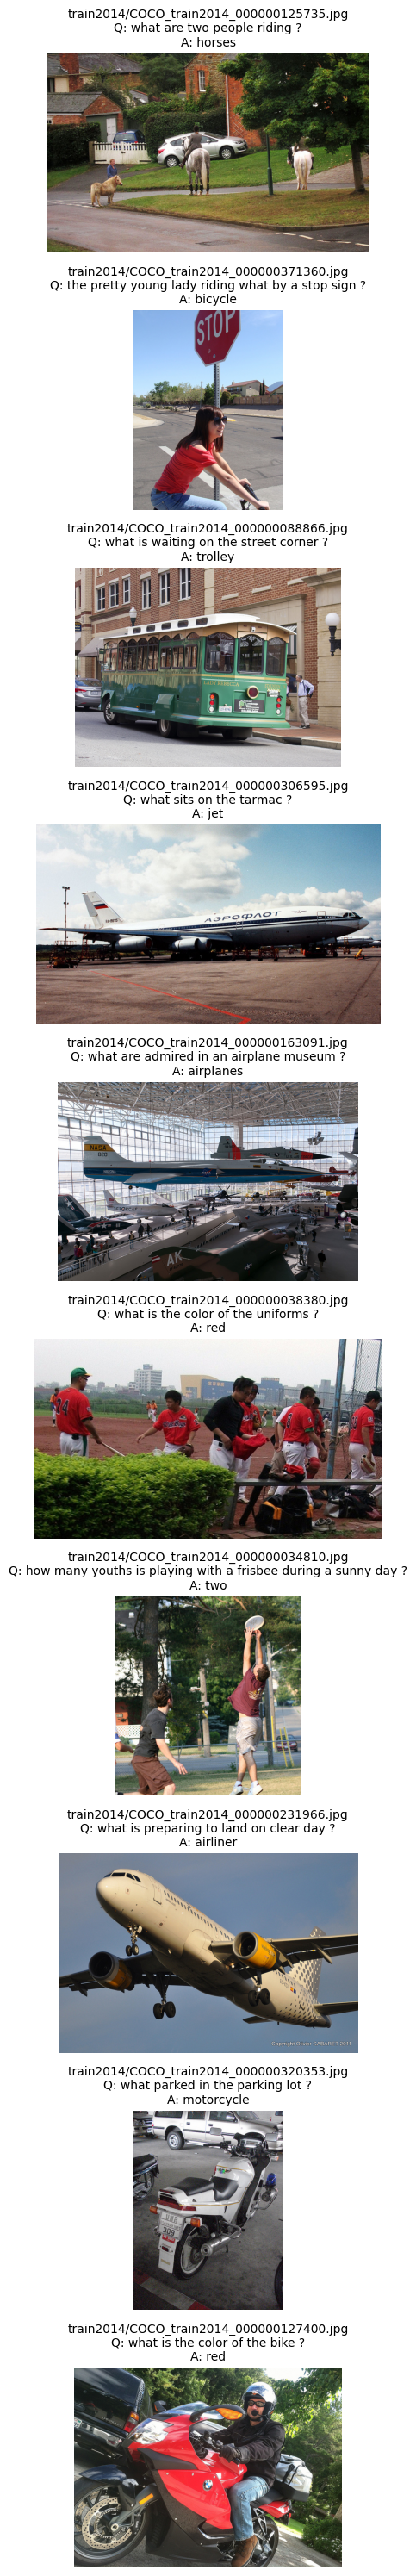

In [17]:
visualize_data(train_data, num_samples=10)

1. Mỗi ảnh có thể có nhiều câu hỏi
2. Mỗi ảnh có nhiều category nên việc lọc ảnh theo vehicle có thể  ảnh đó bao gồm các category khác như baseball, dẫn đến có câu hỏi về baseball

In [43]:
# print all the questions of specific image
def get_questions_by_image(data, img_path):
    img = Image.open(image_root+img_path)
    plt.imshow(img)
    plt.axis('off') 
    questions = [f"{item['question']} - {item['ans']}" for item in data if item['img_path'] == img_path]
    return questions


['where are several planes admired ? - museum',
 'what are admired in an airplane museum ? - airplanes']

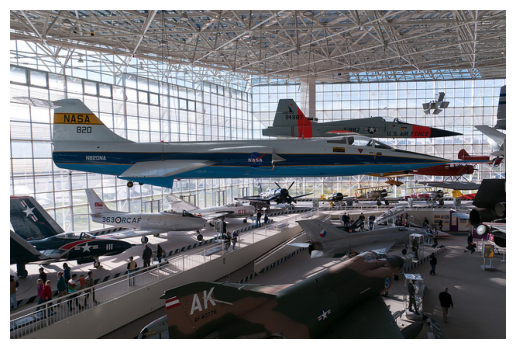

In [44]:
img_path = "train2014/COCO_train2014_000000163091.jpg"
get_questions_by_image(train_data, img_path)

['what travels along the road ? - trolley',
 'what is waiting on the street corner ? - trolley']

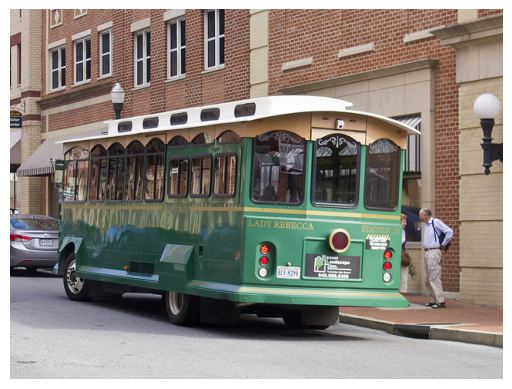

In [45]:
get_questions_by_image(train_data, "train2014/COCO_train2014_000000088866.jpg")

Chứa các câu hỏi không liên quan vehicle 

['there is a man riding what passed a corvette ? - bicycle',
 'what is the man wearing a wetsuit is riding and toting his surfboard ? - bicycle',
 'what is the color of the outfit ? - black',
 'what is the man wearing a wetsuit is riding his bicycle and toting ? - surfboard',
 'what is man wearing a black outfit is riding ? - bicycle']

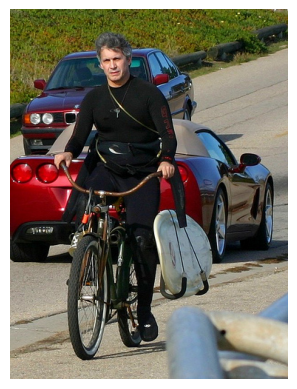

In [49]:
get_questions_by_image(train_data, "train2014/COCO_train2014_000000494174.jpg")